In [14]:
import csv
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

help(warnings.filterwarnings)


Help on function filterwarnings in module warnings:

filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)
    Insert an entry into the list of warnings filters (at the front).
    
    'action' -- one of "error", "ignore", "always", "default", "module",
                or "once"
    'message' -- a regex that the warning message must match
    'category' -- a class that the warning must be a subclass of
    'module' -- a regex that the module name must match
    'lineno' -- an integer line number, 0 matches all warnings
    'append' -- if true, append to the list of filters



In [15]:
# 读入指数构成
index_data = pd.read_csv('stock_model_1_1_index_raw.csv',header=1,
                   names=['code','0101','0201','0301','0401','0501','0601','0701','0801','0901'],
                   encoding = 'gbk')
index_data = index_data[['code','0501']].dropna()  # 只取两列，去掉NA

# 读入个股数据（行业信息）
stock_data = pd.read_csv('stock_model_2_1_stock_raw.csv',header=0,
                   names=['code','name','industry', 'market_cap','roe','growth','turnover','ret_past','ret_future'],
                   encoding = 'gbk')
stock_data = stock_data[['code', 'name','industry']]   #只取三列

# 合并数据
data = index_data.merge(stock_data, left_on = 'code', right_on = 'code', how = 'inner')

data.to_csv("stock_model_1_2_merged.csv", encoding = "gbk", index = 0)

In [16]:
# 按照行业求和，得到行业构成
grouped = data.groupby('industry').sum().reset_index()
industry_data = pd.DataFrame(grouped)
industry_data.columns = ['industry', 'weight']
print(industry_data)
industry_data.to_csv("stock_model_1_3_output.csv", encoding = "gbk", index = 0)


    industry  weight
0       交通运输   3.290
1         传媒   1.565
2       农林牧渔   1.052
3         医药   6.386
4       商贸零售   0.819
5       国防军工   1.441
6       基础化工   1.409
7         家电   5.354
8         建材   1.303
9         建筑   3.250
10       房地产   4.608
11      有色金属   2.265
12        机械   1.990
13        汽车   2.986
14     消费者服务   0.753
15        煤炭   0.967
16   电力及公用事业   2.640
17  电力设备及新能源   1.618
18        电子   4.103
19      石油石化   1.762
20      纺织服装   0.133
21        综合   0.293
22       计算机   1.884
23      轻工制造   0.242
24        通信   2.176
25        钢铁   1.020
26        银行  16.187
27     非银行金融  17.935
28      食品饮料   9.186


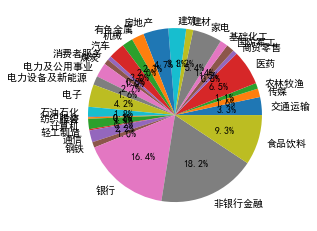

In [17]:
# 做饼图
plt.rcParams['font.sans-serif']=['SimHei']  # label用中文显示
plt.pie(industry_data['weight'], labels = industry_data['industry'], autopct='%1.1f%%')
plt.show()

In [9]:
import csv
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

help(warnings.filterwarnings)

data = pd.read_csv('stock_model_2_1_stock_raw.csv',header=0,
                   names=['code','name','industry', 'market_cap','roe','growth','turnover','ret_past','ret_future'],
                   encoding = 'gbk')

# 数据筛选和清洗, 非ST，有数据，市值不太小
data = data.dropna()  # 去掉没有数据的(刚上市等各种原因)
data = data[data['market_cap'] >= 20e8]
data = data[data['roe'] > 0]
print(data)
data.to_csv("stock_model_2_2_clean.csv", encoding = "gbk")

Help on function filterwarnings in module warnings:

filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)
    Insert an entry into the list of warnings filters (at the front).
    
    'action' -- one of "error", "ignore", "always", "default", "module",
                or "once"
    'message' -- a regex that the warning message must match
    'category' -- a class that the warning must be a subclass of
    'module' -- a regex that the module name must match
    'lineno' -- an integer line number, 0 matches all warnings
    'append' -- if true, append to the list of filters

           code  name industry    market_cap      roe    growth  turnover  \
0     000002.SZ   万科A      房地产  3.219173e+11  23.4175   32.4225   13.2515   
2     000005.SZ  世纪星源  电力及公用事业  3.493172e+09  10.5847  583.4177   46.0259   
3     000006.SZ  深振业A      房地产  8.234970e+09  14.8612   12.5103   29.5324   
5     000008.SZ  神州高铁       机械  1.192961e+10   4.5088  -61.5686   

In [10]:
# 分组处理
grouped_roe = data['roe'].groupby(data['industry']).agg(['mean', 'std']).add_prefix('roe_')
data = pd.merge(data, grouped_roe, left_on='industry', right_index = True)

grouped_growth = data['growth'].groupby(data['industry']).agg(['mean', 'std']).add_prefix('growth_')
data = pd.merge(data, grouped_growth, left_on='industry', right_index = True)

grouped_growth = data['turnover'].groupby(data['industry']).agg(['mean', 'std']).add_prefix('turnover_')
data = pd.merge(data, grouped_growth, left_on='industry', right_index = True)

grouped_growth = data['ret_past'].groupby(data['industry']).agg(['mean', 'std']).add_prefix('ret_past_')
data = pd.merge(data, grouped_growth, left_on='industry', right_index = True)

data.to_csv("stock_model_2_3_stat.csv", encoding = "gbk")

In [11]:
# 分组得分
data['roe_score'] = (data['roe'] - data['roe_mean']) / data['roe_std']
data['growth_score'] = (data['growth'] - data['growth_mean']) / data['growth_std']
data['turnover_score'] = -(data['turnover'] - data['turnover_mean']) / data['turnover_std']
data['ret_past_score'] = -(data['ret_past'] - data['ret_past_mean']) / data['ret_past_std']
print(data)

data.to_csv("stock_model_2_4_score.csv", encoding = "gbk")

           code  name industry    market_cap      roe     growth  turnover  \
0     000002.SZ   万科A      房地产  3.219173e+11  23.4175    32.4225   13.2515   
3     000006.SZ  深振业A      房地产  8.234970e+09  14.8612    12.5103   29.5324   
7     000011.SZ  深物业A      房地产  6.057304e+09  18.9379    -4.8640   86.6291   
9     000014.SZ  沙河股份      房地产  2.115887e+09  17.9626  1306.2534   82.0457   
22    000031.SZ   大悦城      房地产  2.704925e+10  19.1671    15.5360   34.9104   
...         ...   ...      ...           ...      ...        ...       ...   
3047  601939.SH  建设银行       银行  1.500617e+12  13.5591     4.9303   36.8004   
3057  601988.SH  中国银行       银行  1.088165e+12  11.5848     4.0268    1.9154   
3063  601997.SH  贵阳银行       银行  3.162862e+10  17.2560    13.9764   60.3864   
3064  601998.SH  中信银行       银行  2.784066e+11  10.6452     5.8258    3.9959   
3240  603323.SH  苏农银行       银行  1.143900e+10   9.0249     9.6356   91.3287   

      ret_past  ret_future   roe_mean  ...  growth_mean  growth

In [12]:
# 截断，加总，得到每个股票的最后分数
max_std = 3
data['roe_score'][data['roe_score'] > max_std] = max_std
data['roe_score'][data['roe_score'] < -max_std] = -max_std

data['growth_score'][data['growth_score'] > max_std] = max_std
data['growth_score'][data['growth_score'] < -max_std] = -max_std

data['turnover_score'][data['turnover_score'] > max_std] = max_std
data['turnover_score'][data['turnover_score'] < -max_std] = -max_std

data['ret_past_score'][data['ret_past_score'] > max_std] = max_std
data['ret_past_score'][data['ret_past_score'] < -max_std] = -max_std

data['alpha'] = (data['roe_score'] + data['growth_score'] + data['turnover_score'] + data['ret_past_score']) / 4

data.to_csv("stock_model_2_5_alpha.csv", encoding = "gbk", float_format='%.2f', index = 0)

In [13]:
# 每个行业选出排名前N的股票
data.sort_values(['industry', 'alpha'], ascending = [1, 0], inplace = True)
grouped = data.groupby(['industry']).head(2)
selected = pd.DataFrame(grouped)
selected = selected[['code', 'name', 'industry', 'alpha']]

selected.to_csv("stock_model_2_6_selected.csv", encoding = "gbk", float_format='%.2f', index = 0)

In [15]:
#合并入行业权重

index_data = pd.read_csv('stock_model_1_3_output.csv',header=1,names=['industry','industry_weight'], encoding = 'gbk')
selected = selected.merge(index_data, left_on = 'industry', right_on = 'industry', how = 'inner')

selected.to_csv("stock_model_2_7_selected.csv", encoding = "gbk", float_format='%.2f', index = 0)

In [17]:
# 建立投资组合
selected['weight'] = selected['industry_weight'] / 2
portfolio = selected[['code', 'name', 'industry', 'weight']]
portfolio.to_csv("stock_model_2_8_portfolio.csv", encoding = "gbk", float_format='%.2f', index = 0)

In [18]:
# 业绩评价
portfolio = portfolio.merge(data, left_on = ['code','name','industry'], right_on = ['code','name','industry'], how = 'inner')
portfolio = portfolio[['code', 'name', 'industry', 'weight', 'ret_future']]
portfolio.to_excel("stock_model_2_9_evaluation.xls", encoding = "gbk", float_format='%.2f', index = 0)